# CMIP6 test prediction

In [1]:
import os
import sys
import xarray as xr
import dask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)
from IndexDrivers import (
    AnomaliesIndex,
    MaxIndex, 
    calculate_anomalies
)
from PredictorsDrivers import (
    Predictor
)

c:\Users\marti\Desktop\data\hw_extra


## Load cmip6 drivers

In [17]:
path_drivers = "data/03_primary/drivers/cmip6"
model = "EC-Earth3"
scenario = "historical"

local_climate_drivers = [
    "local_climate/nino34",
    "local_climate/nino12",
    "local_climate/anom_wind_cl",
    "local_climate/3832cbd6_psl_1",
    "local_climate/anom_psl_b",
    "local_climate/anom_psl_A_arg",
    "local_climate/anom_psl_A_cl"]


anticyclone_drivers = ["pacific_anticyclone/south_pacific_always_detect"]

In [18]:
nino34_ds = xr.open_mfdataset(f"{path_drivers}/{model}/{scenario}/local_climate/nino34/monthly/*.nc",combine="by_coords",engine="netcdf4")
nino12_ds = xr.open_mfdataset(f"{path_drivers}/{model}/{scenario}/local_climate/nino12/monthly/*.nc",combine="by_coords",engine="netcdf4")
anom_wind_cl_ds = xr.open_mfdataset(f"{path_drivers}/{model}/{scenario}/local_climate/anom_wind_cl/monthly/*.nc",combine="by_coords",engine="netcdf4")
anom_3832cbd6_psl_1_ds = xr.open_mfdataset(f"{path_drivers}/{model}/{scenario}/local_climate/3832cbd6_psl_1/monthly/*.nc",combine="by_coords",engine="netcdf4")
anom_psl_b_ds = xr.open_mfdataset(f"{path_drivers}/{model}/{scenario}/local_climate/anom_psl_b/monthly/*.nc",combine="by_coords",engine="netcdf4")
anom_psl_A_arg_ds = xr.open_mfdataset(f"{path_drivers}/{model}/{scenario}/local_climate/anom_psl_A_arg/monthly/*.nc",combine="by_coords",engine="netcdf4")
anom_psl_A_cl_ds = xr.open_mfdataset(f"{path_drivers}/{model}/{scenario}/local_climate/anom_psl_A_cl/monthly/*.nc",combine="by_coords",engine="netcdf4")
anticyclone_ds = xr.open_mfdataset(f"{path_drivers}/{model}/{scenario}/pacific_anticyclone/south_pacific_always_detect/monthly/*.nc",combine="by_coords",engine="netcdf4")

In [19]:
nino34_ds = nino34_ds.drop_vars([var for var in list(nino34_ds.data_vars) if "mean" not in var]).rename_vars({"region_tos_mean": "nino34"})
nino12_ds = nino12_ds.drop_vars([var for var in list(nino12_ds.data_vars) if "mean" not in var]).rename_vars({"region_tos_mean": "nino12"})
anom_wind_cl_ds = anom_wind_cl_ds.drop_vars([var for var in list(anom_wind_cl_ds.data_vars) if "mean" not in var]).rename_vars({"region_ua_mean": "wind_cl"})
anom_3832cbd6_psl_1_ds = anom_3832cbd6_psl_1_ds.drop_vars([var for var in list(anom_3832cbd6_psl_1_ds.data_vars) if "mean" not in var]).rename_vars({"region_psl_mean": "psl_wind"})
anom_psl_b_ds = anom_psl_b_ds.drop_vars([var for var in list(anom_psl_b_ds.data_vars) if "mean" not in var]).rename_vars({"region_psl_mean": "psl_b"})
anom_psl_A_arg_ds = anom_psl_A_arg_ds.drop_vars([var for var in list(anom_psl_A_arg_ds.data_vars) if "mean" not in var]).rename_vars({"region_psl_mean": "psl_A_arg"})
anom_psl_A_cl_ds = anom_psl_A_cl_ds.drop_vars([var for var in list(anom_psl_A_cl_ds.data_vars) if "mean" not in var]).rename_vars({"region_psl_mean": "psl_A_cl"})
anticyclone_ds = anticyclone_ds.drop_vars("center_detected")

In [20]:
ds_features = xr.merge((nino34_ds, nino12_ds, anom_wind_cl_ds, anom_3832cbd6_psl_1_ds, anom_psl_b_ds, anom_psl_A_arg_ds, anom_psl_A_cl_ds, anticyclone_ds))
# ds_features = xr.merge((nino34_ds, nino12_ds, anom_wind_cl_ds, anom_3832cbd6_psl_1_ds, anom_psl_b_ds, anom_psl_A_cl_ds, anticyclone_ds))

In [34]:
cmip6_features = ds_features.to_dataframe()

In [23]:
era5_features = {i: pd.read_parquet(f"data/climate_features/chile/predictor_f1c4c128_{i}.parquet") for i in range(1,13)}
era5_features[1]

,c2b06127-sst,379b6a95-sst,73d2026c-max_value,73d2026c-latitude,73d2026c-longitude,09447a4a-u,fd444d4e-msl,d49e4204-msl,b3dbce5f-msl,3e4da1be-msl,HWN,HWF,HWD,HWM,HWA
Date,,,,,,,,,,,,,,,
1972-01-01,0.258211,-0.823776,101901.1250,-33.50,275.00,0.255815,-181.718750,-128.015625,-130.460938,-210.093750,0.1,0.3,0.3,0.451728,0.981709
1973-01-01,1.648206,1.788924,102338.6250,-34.25,266.00,0.397640,-88.437500,-82.882812,33.046875,-138.046875,0.1,0.5,0.5,0.138348,0.180234
1974-01-01,-0.983547,-2.073097,102199.3125,-32.50,260.00,1.181844,-157.625000,-7.312500,-30.382812,-214.414062,0.0,0.0,0.0,0.000000,0.000000
1975-01-01,-0.702570,-0.711768,102327.5625,-37.00,265.75,-1.127910,47.296875,-50.632812,6.281250,13.992188,0.0,0.0,0.0,0.000000,0.000000
1976-01-01,-1.446592,-1.766107,102232.1875,-35.25,260.75,0.139356,-70.804688,-70.585938,2.429688,-109.445312,0.0,0.0,0.0,0.000000,0.000000
1977-01-01,-0.108354,0.299429,101883.0625,-32.75,269.75,0.013179,-31.976562,-98.617188,-113.164062,-68.296875,0.3,0.9,0.9,0.690285,0.936834
1978-01-01,-0.574575,0.284983,102405.3125,-35.50,260.00,-0.280605,189.062500,156.718750,190.585938,207.265625,0.0,0.0,0.0,0.000000,0.000000
1979-01-01,0.168853,-0.015246,101957.3750,-34.50,278.00,-0.388606,68.304688,37.351562,3.867188,76.125000,0.4,1.4,0.8,0.334205,0.752120
1980-01-01,0.379882,0.564006,102158.0000,-34.75,266.00,-0.237673,-71.906250,-19.820312,-1.531250,-65.921875,0.3,0.9,0.9,0.390651,0.705710


In [25]:
for season, df in era5_features.items():
    era5_features[season] = df.rename(columns={"379b6a95-sst": "nino34", "c2b06127-sst": "nino12", "73d2026c-max_value":"pressure", "73d2026c-latitude": "latitude", "73d2026c-longitude": "longitude", "09447a4a-u": "wind_cl", "fd444d4e-msl": "psl_wind", "d49e4204-msl": "psl_b" , "b3dbce5f-msl": "psl_A_cl", "3e4da1be-msl": "psl_A_arg"})

In [27]:
import tensorflow as tf
import os
import numpy as np
import random
import keras
SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import TimeSeriesSplit

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

from sklearn.svm import SVR
from xgboost import XGBRegressor
import sys
from catboost import CatBoostRegressor


In [29]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    SERA,
    sera_objective,
    piecewise_linear_phi_np
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [30]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]
cnn_rnn_model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(era5_features[1].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
bounds = (-1.1692892810242344, -0.30647585455315646, 3.0, 6.499969486244418)
loss_fn=SERA(bounds=bounds,T=100, initial_weight=0.1, fn="piecewise2")

In [32]:
pred = PredictionModel(era5_features[12], 12, indices_of_interest, cnn_rnn_model, name_regressor="CNNRNN16",loss_fn=loss_fn)
pred.compile_keras_model()
y_train, y_pred_train = pred.train(5)
y_test, y_pred = pred.predict(5)


1/1 [==============================] - 0s 20ms/step


In [39]:
cmip6_features_12 = cmip6_features[cmip6_features.index.month==12]
cmip6_features_12 = cmip6_features_12[(cmip6_features_12.index.year >=1972) & (cmip6_features_12.index.year <= 2014)]
cmip6_features_12[indices_of_interest] = era5_features[12][indices_of_interest]
cmip6_features_12

,nino34,nino12,wind_cl,psl_wind,psl_b,psl_A_arg,psl_A_cl,latitude,longitude,pressure,HWN,HWF,HWD,HWM,HWA
time,,,,,,,,,,,,,,,
1972-12-01,-1.664352,-1.631040,-0.327188,20.583019,47.561104,27.028765,74.922943,-37.543776,265.781250,102346.640625,0.480479,0.246884,0.044120,0.056377,0.011462
1973-12-01,1.526199,1.923155,-0.199666,-82.482140,-41.855747,-109.727745,18.875267,-34.035014,271.406250,102025.179688,-0.724657,-0.689644,-0.705921,-0.682288,-0.692049
1974-12-01,-0.325938,0.001363,-0.093985,3.396549,-16.670200,-18.788235,-30.153143,-38.245528,265.781250,102077.273438,-0.322945,-0.377468,-0.330900,0.199594,0.018719
1975-12-01,-0.950264,-0.189034,0.875232,-53.995365,13.003348,-47.449928,22.952858,-31.228004,267.890625,102072.726562,-0.724657,-0.689644,-0.705921,-0.682288,-0.692049
1976-12-01,1.083337,1.653927,-0.039897,-89.282707,-81.950890,-98.878433,-105.286224,-31.929757,259.453125,101953.632812,-0.724657,-0.689644,-0.705921,-0.682288,-0.692049
1977-12-01,1.216107,0.532703,0.275692,-72.189644,11.015625,-28.860321,-24.200285,-34.035014,259.453125,102354.062500,0.882191,0.767178,0.294134,1.179179,1.300330
1978-12-01,-1.200634,-0.782925,1.879261,-198.143372,91.358818,-211.966141,58.949131,-34.035014,265.781250,102199.953125,-0.322945,-0.377468,-0.330900,-0.554377,-0.610874
1979-12-01,-0.135672,0.207855,0.070984,47.547047,11.100447,76.079308,89.633430,-31.228004,267.187500,102147.367188,-0.322945,-0.377468,-0.330900,-0.236109,-0.171550
1980-12-01,0.287200,0.462443,-0.061144,-108.774300,-100.161552,-89.121094,-80.199219,-34.736767,272.812500,101913.328125,-0.724657,-0.689644,-0.705921,-0.682288,-0.692049


In [40]:
data_cmip6, features = pred.form_matrix(cmip6_features_12)

In [81]:
predicted = pd.DataFrame(pred.regressor.predict(pred.reshape_for_keras(data_cmip6[features]))).rename(columns={i: label for i,label in enumerate(indices_of_interest)})
predicted["Date"] = cmip6_features_12.index
predicted.set_index("Date",inplace=True)
predicted

2/2 [==============================] - 0s 17ms/step


,HWN,HWF,HWD,HWM,HWA
Date,,,,,
1972-12-01,0.824620,1.068352,1.556712,1.177763,1.604276
1973-12-01,1.001251,0.437624,0.432853,0.462723,0.446636
1974-12-01,0.826438,0.870128,1.419433,1.556588,1.386934
1975-12-01,0.119428,-0.031666,-0.012429,0.760971,-0.193753
1976-12-01,0.866232,0.255979,0.114670,0.672660,0.129039
1977-12-01,0.009768,-0.414608,-0.501993,0.616065,-0.517221
1978-12-01,-0.293312,-0.577273,-0.476181,0.607009,-0.757131
1979-12-01,0.509205,0.715555,0.495240,0.762050,0.444305
1980-12-01,1.173152,0.818603,1.063122,0.748457,1.079385


In [82]:
era5_features[12][indices_of_interest].describe()

,HWN,HWF,HWD,HWM,HWA
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,1.741526e-17,-8.707632e-18,1.741526e-17,2.176908e-17,2.176908e-17
std,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00
min,-7.246566e-01,-6.896437e-01,-7.059205e-01,-6.822878e-01,-6.920494e-01
25%,-7.246566e-01,-6.896437e-01,-7.059205e-01,-6.822878e-01,-6.920494e-01
50%,-3.229448e-01,-3.774677e-01,-3.309002e-01,-4.301148e-01,-4.719322e-01
75%,2.796229e-01,2.468843e-01,1.691268e-01,1.667838e-02,1.509068e-02
max,3.292462e+00,2.952410e+00,2.794269e+00,3.281647e+00,3.023742e+00


In [83]:
predicted.describe()

,HWN,HWF,HWD,HWM,HWA
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.510427,0.430363,0.424886,0.765049,0.420457
std,0.505052,0.647292,0.689026,0.456296,0.729113
min,-0.406245,-0.786855,-0.532940,-0.179352,-0.757131
25%,0.155241,-0.009588,-0.106617,0.479869,-0.146844
50%,0.434501,0.350793,0.249269,0.748457,0.322186
75%,0.949606,0.844365,0.943704,1.017650,1.010287
max,1.354897,1.708991,1.737872,1.873756,1.717693


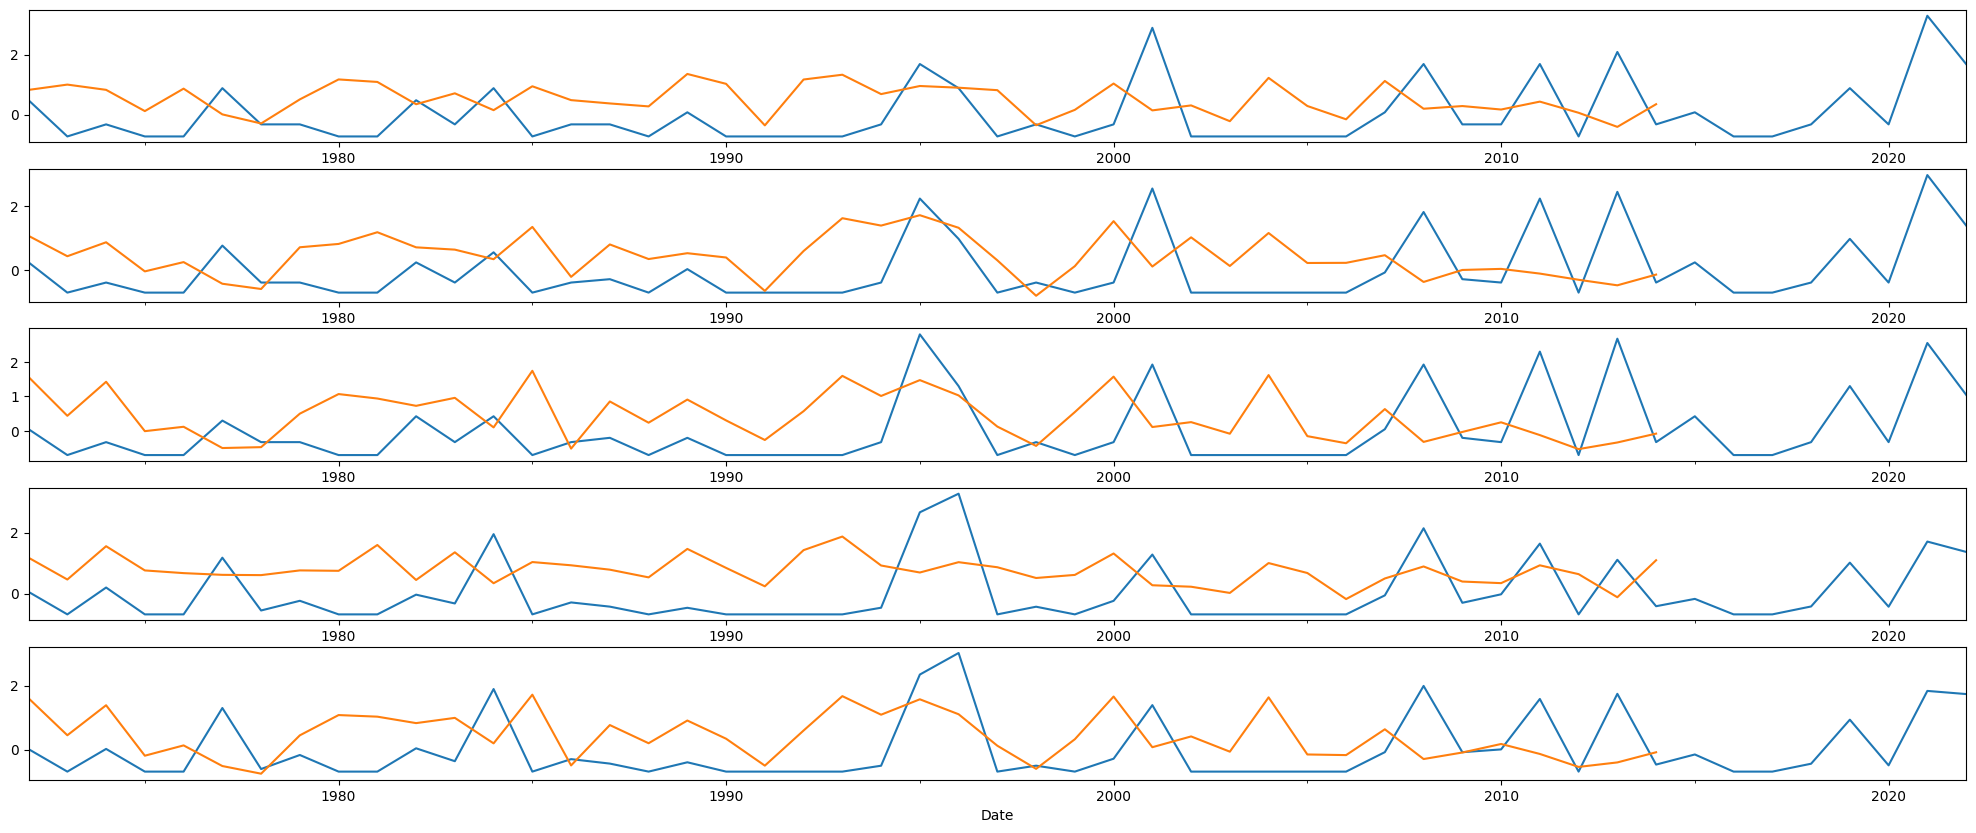

In [84]:
fig, axs = plt.subplots(5, figsize=(25,10))
for i, label in enumerate(indices_of_interest):
    era5_features[12][label].plot(ax=axs[i])
    predicted[label].plot(ax=axs[i])

In [ ]:
import pandas as pd
import numpy as np

def compare_dataframes_by_decade(df1, df2, date_column='date'):
    cols = list(df2.columns)
    df1['decade'] = (df1.index.year // 10) * 10
    df2['decade'] = (df2.index.year // 10) * 10
    
    # Get numeric columns (excluding date and decade)
    numeric_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
    if date_column in numeric_cols:
        numeric_cols.remove(date_column)
    
    agg_dict = {}
    for col in numeric_cols:
        if col in ['HWN', 'HWF']:
            agg_dict[col] = 'sum'
        else:
            agg_dict[col] = 'mean'
    
    df1_grouped = df1.groupby('decade')[numeric_cols].agg(agg_dict)
    df2_grouped = df2.groupby('decade')[numeric_cols].agg(agg_dict)
    
    # Compare dataframes
    comparison_results = {}
    
    for col in numeric_cols:
        if col in df1_grouped.columns and col in df2_grouped.columns:
            # Merge on decade to align data
            merged = pd.merge(df1_grouped[col], df2_grouped[col], 
                            left_index=True, right_index=True, 
                            suffixes=('_era5', '_cmip6'), how='outer')
            
            # Calculate differences and percentage changes
            merged['difference'] = merged[f'{col}_cmip6'] - merged[f'{col}_era5']
            merged['pct_change'] = (merged['difference'] / merged[f'{col}_era5']) * 100
            
            comparison_results[col] = merged
    
    return comparison_results

    
# Compare dataframes
results = compare_dataframes_by_decade(era5_features[12][indices_of_interest], predicted, 'Date')

# Display results
for column, comparison in results.items():
    print(f"\n=== {column.upper()} COMPARISON BY DECADE ===")
    print(comparison.round(2))
    print(f"Average difference: {comparison['difference'].mean():.2f}")
    print(f"Average % change: {comparison['pct_change'].mean():.2f}%")


=== HWN COMPARISON BY DECADE ===
        HWN_era5  HWN_cmip6  difference  pct_change
decade                                             
1970       -1.78       3.86        5.64     -317.04
1980       -2.43       6.91        9.33     -384.63
1990       -2.43       6.33        8.76     -361.02
2000        0.39       4.24        3.85      997.51
2010        1.59       0.61       -0.98      -61.59
2020        4.66        NaN         NaN         NaN
Average difference: 5.32
Average % change: -25.35%

=== HWF COMPARISON BY DECADE ===
        HWF_era5  HWF_cmip6  difference  pct_change
decade                                             
1970       -2.19       2.32        4.51     -206.26
1980       -2.94       6.53        9.47     -321.97
1990       -1.69       6.05        7.74     -457.11
2000        0.18       4.54        4.36     2430.50
2010        2.68      -0.94       -3.62     -135.13
2020        3.97        NaN         NaN         NaN
Average difference: 4.49
Average % change: 262.01

C:\Users\marti\AppData\Local\Temp\ipykernel_68804\2579645379.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['decade'] = (df1.index.year // 10) * 10
